In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


Load data từ API 



---


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

Hiển thị ảnh


In [0]:
first_image = train_images[0]
# Tên class tương ứng chỉ mục
class_names = ['Áo thun', 'Quần dài', 'Áo liền quần', 'Đầm', 'Áo khoác',
               'Sandal', 'Áo sơ mi', 'Giày', 'Túi xách', 'Ủng']

<function matplotlib.pyplot.show>

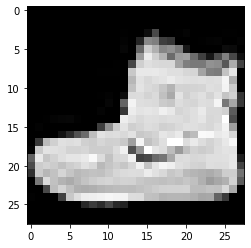

In [8]:
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show

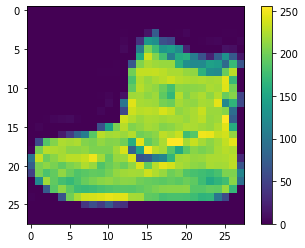

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

<function matplotlib.pyplot.show>

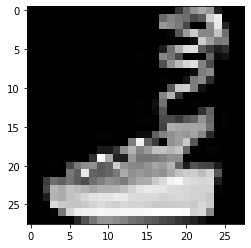

In [0]:
second_image = train_images[36]
second_image = np.array(second_image, dtype='float')
pixels_2 = second_image.reshape((28, 28))
plt.imshow(pixels_2, cmap='gray')
plt.show

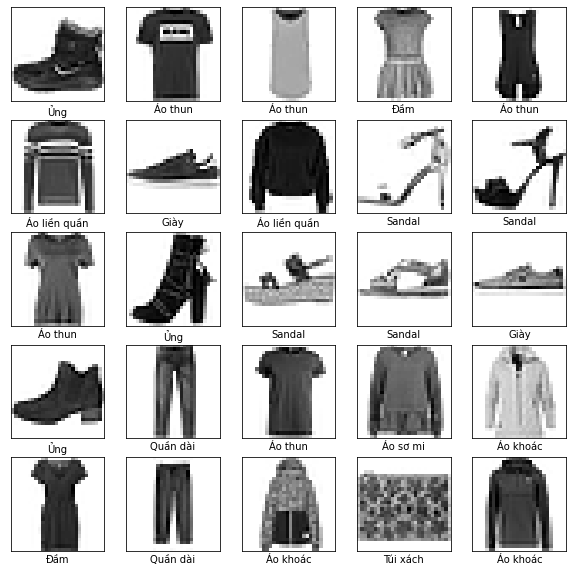

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Xây dựng mạng huấn luyên
 - Một lớp Flatten
 - Một lớp Dense 100, activation: Relu
 - Một lớp Dense 10, activation: Softmax


In [0]:
train_images, test_images = train_images / 255.0, test_images / 255.0 

In [0]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(100,activation = "relu"))
model.add(Dense(10, activation="softmax"))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Thêm loss function vào model

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Tiến hành training

In [0]:
model.fit(train_images, train_labels, epochs=30)



Epoch 1/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1030 - accuracy: 0.9610
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1031 - accuracy: 0.9616
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1013 - accuracy: 0.9622
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1010 - accuracy: 0.9621
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0989 - accuracy: 0.9635
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0982 - accuracy: 0.9630
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0955 - accuracy: 0.9649
Epoch 8/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0951 - accuracy: 0.9641
Epoch 9/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0941 - accuracy: 0.9645
Epoch 10/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.091

Tiến hành dự đoán

In [0]:
model.predict(test_images)

array([[3.2017502e-20, 1.0365178e-28, 1.2180056e-25, ..., 5.4220822e-10,
        1.3586570e-28, 1.0000000e+00],
       [3.3742437e-10, 2.4230311e-36, 9.9997449e-01, ..., 9.5980518e-29,
        1.3913939e-19, 1.5369505e-28],
       [2.1369211e-28, 1.0000000e+00, 5.9537377e-23, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.4140578e-20, 0.0000000e+00, 8.9419341e-19, ..., 1.4654923e-29,
        1.0000000e+00, 0.0000000e+00],
       [1.7084818e-25, 1.0000000e+00, 4.9877754e-24, ..., 3.2498279e-34,
        3.5806897e-36, 2.0539185e-30],
       [3.4110257e-14, 7.5747152e-20, 2.9690074e-12, ..., 3.1361513e-10,
        3.1180285e-08, 9.0855983e-17]], dtype=float32)